Recognizing the critical imperative of early detection and intervention in sepsis, a life-threatening condition, the project aims to leverage machine learning and a predictive API deployment. The objective is to furnish healthcare professionals with a tool for identifying at-risk patients. Timely intervention is paramount for improving outcomes and reducing sepsis-associated mortality rates. Thus, the project endeavors to deliver a fast, reliable, and seamlessly integrated solution within existing healthcare workflows. Ultimately, it strives to save lives and enhance patient care quality by enabling informed decisions based on precise sepsis likelihood predictions.

# **FastAPI-Based Sepsis Prediction API: A Machine Learning Approach for Timely Intervention of Sepsis**

Sepsis is a critical, life-threatening condition triggered by the body's response to an infection, causing harm to its own tissues and organs. Characterized by a complex syndrome, its early identification poses challenges due to symptoms that often mimic those of common illnesses like fever and low blood pressure. Leading to significant mortality rates in hospital settings, timely detection and treatment are imperative for enhancing patient outcomes.

## BUSINESS UNDERSTANDING

## Dataset Overview
The sepsis dataset comprises patient records with comprehensive clinical features, including:

- **ID**: Unique patient identification number.
- **PRG**: Plasma glucose level (mmol/L).
- **PL**: Blood work result 1 (mu U/ml).
- **PR**: Blood pressure (mm Hg).
- **SK**: Blood work result 2 (mm).
- **TS**: Blood work result 3 (mu U/ml).
- **M11**: Body mass index (weight in kg/(height in m)²).
- **BD2**: Blood work result 4 (mu U/ml).
- **Age**: Patient’s age (years).
- **Insurance**: Indication of whether the patient holds a valid insurance card.
- **Sepsis**: Classification indicating whether the patient has sepsis (Positive) or not (Negative).

##             HYPOTHESIS

* **Null Hypothesis (H0):**
There is no significant relationship between a patient's age and the likelihood of them having sepsis.

* **Alternative Hypothesis (H1):**
There exists a significant relationship between a patient's age and the likelihood of them having sepsis. Specifically, older patients may be more likely to develop sepsis compared to younger patients.

## QUESTIONS

1) What is the average body mass index (BMI) of patients diagnosed with sepsis compared to those without sepsis?

2) What is the distribution of BMI categories among patients diagnosed with sepsis compared to those without sepsis?

3) Does Age Correlate with Sepsis Occurrence?

4) What is the average age of patients diagnosed with sepsis?

5) Is there a correlation between blood pressure levels and the likelihood of developing sepsis?

6) What is the Average plasma glucose level of patients with and without Sepsis?

7) How does the distribution of insurance status differ between septic and non-septic patients?

## Importation

In [1]:
# Import necessary libraries for data handling 
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# hypothesis testing
from scipy.stats import chi2_contingency

# Machine learning classification model from sklean
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from functools import partial
from sklearn.metrics import roc_curve, auc

# class imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as impipeline

# Hyperparameters Fine-tuning
from sklearn.model_selection import GridSearchCV

# Other utilities
import joblib
import os
import pickle

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./Dataset/Paitients_Files_Train.csv')
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


## Data understanding & EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# Check the unique values of Plasma glucose level
df["PRG"].value_counts()

PRG
1     100
0      93
2      76
3      59
4      54
5      49
7      37
6      37
8      32
9      20
10     16
12      8
11      7
13      7
14      2
15      1
17      1
Name: count, dtype: int64

**Please Note:**
Under normal physiological circumstances, blood plasma glucose levels cannot reach zero in living organisms, as glucose serves as the primary energy source for cells. Therefore, the presence of zero values (0 mmol/L) in the dataset suggests potential data discrepancies, including data entry errors, **missing values**, or other inaccuracies. Therefore, the zero vlaues in the dataset would be treated as NUll Values.

In [7]:
# pd.reset_option('display.max_rows', None)
# pd.reset_option('display.max_columns', None)

In [8]:
# Check for the unique values of the Blood work result 1 (mu U/ml)
df["PL"].value_counts()

PL
100    15
99     14
125    11
95     11
105    11
       ..
44      1
191     1
183     1
160     1
67      1
Name: count, Length: 129, dtype: int64

In [9]:
# Check the unique values of Blood pressure (PR)
df["PR"].value_counts()

PR
70     46
68     41
74     38
72     37
64     37
78     31
80     30
66     29
76     29
0      28
62     26
60     26
82     22
90     20
84     19
88     15
86     14
58     13
50     10
56     10
52      8
54      8
75      7
92      7
85      6
65      6
48      5
98      3
44      3
96      3
110     3
108     2
55      2
30      2
94      2
104     2
100     2
102     1
61      1
40      1
46      1
95      1
122     1
24      1
Name: count, dtype: int64

**Please Note:**
In normal physiological conditions, blood pressure does not reach zero in living organisms. Therefore, the presence of zero values (0 mm Hg) in the dataset suggests potential data discrepancies, including data entry errors, **missing values**, or other inaccuracies. Therefore, the zero vlaues in the dataset would be treated as NUll Values.

In [10]:
# Check for unique values of the Blood work result 2 (mm)
df["SK"].value_counts()

SK
0     175
32     25
30     24
33     17
23     17
28     17
31     15
18     15
15     14
27     14
19     14
25     13
29     13
40     13
22     13
37     13
41     12
39     12
35     11
26     10
20      9
24      9
17      9
13      8
34      8
21      8
42      8
36      8
38      7
16      6
12      6
14      6
43      5
11      5
45      5
10      4
46      4
44      4
50      3
47      3
54      2
7       2
52      2
48      2
8       2
49      2
56      1
51      1
60      1
63      1
99      1
Name: count, dtype: int64

**Please Note:**
zero values (0 mm) of the blood work may also indicate **missing** or invalid data, and they should be treated accordingly during data preprocessing and analysis.

In [11]:
# Check the unique values of the Blood work result 3 (mu U/ml)
df["TS"].value_counts()

TS
0      289
140      8
130      7
105      7
94       6
      ... 
680      1
370      1
744      1
478      1
25       1
Name: count, Length: 164, dtype: int64

**NB:** It's worth noting that a blood work result of zero (0) for TS, similar to other blood work measurements, may indicate various scenarios, including missing data or measurement errors and should be treated accordingly.

In [12]:
# Check the unique values of the Body mass index (weight in kg/(height in m)²).
df["M11"].value_counts()

M11
32.0    11
31.6    11
33.3    10
31.2     9
0.0      9
        ..
67.1     1
43.5     1
28.4     1
50.0     1
31.3     1
Name: count, Length: 233, dtype: int64

**Please Note:**
Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. It's worth noting that a BMI value of zero (0.0) may indicate **missing data** or measurement errors, similar to other measurements encountered in the dataset. Therefore, the zero vlaues in the dataset would be treated accorddingly as NUll Values.

In [13]:
# Checking for the Unique values of the Blood work result 4 (mu U/ml).
df["BD2"].value_counts()

BD2
0.254    6
0.258    5
0.268    4
0.687    4
0.299    4
        ..
0.395    1
0.136    1
0.578    1
0.383    1
0.194    1
Name: count, Length: 437, dtype: int64

In [14]:
# Checking the unique values of the Patient’s age (years).
df["Age"].value_counts()

Age
22    52
21    52
25    40
24    37
23    27
29    27
28    26
26    25
27    21
41    20
31    19
37    18
30    16
33    15
42    13
32    13
36    13
38    13
46    11
35    10
39    10
34     9
45     8
40     8
43     8
51     7
58     7
44     7
52     5
60     5
57     5
47     4
62     4
55     4
50     4
54     4
48     3
59     3
65     3
53     3
66     3
49     3
63     3
67     3
61     2
56     2
69     1
72     1
81     1
64     1
Name: count, dtype: int64

In [15]:
#Checking the unique entries of the of the Sepssis column.
df["Sepssis"].unique()

array(['Positive', 'Negative'], dtype=object)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


**Insights🧮**
1. Plasma Glucose Level (PRG):
The mean PRG value is approximately 3.82, with a standard deviation of 3.36, indicating some variability in glucose levels among patients.

2. Blood Work Result 1 (PL):
The mean PL value is around 120.15, with a standard deviation of 32.68, indicating variability in the blood work results among patients.

3. Blood Pressure (PR):
The mean blood pressure is approximately 68.73 mm Hg, with a standard deviation of 19.34, indicating some variability in blood pressure readings among patients.

4. Blood Work Result 2 (SK):
The mean SK value is approximately 20.56, with a standard deviation of 16.02, indicating variability in blood work results among patients.

5. Blood Work Result 3 (TS):
The mean TS value is approximately 79.46, with a large standard deviation of 116.58, suggesting significant variability in blood work results among patients.

6. Body Mass Index (M11):
The mean BMI is around 31.92, with a standard deviation of 8.01, suggesting some variability in BMI values among patients.

7. Blood Work Result 4 (BD2):
The mean BD2 value is approximately 0.48, with a standard deviation of 0.34, indicating variability in blood work results among patients.

8. Age:
The mean age of patients is approximately 33.29 years, with a standard deviation of 11.83, indicating some variability in the age distribution. The age range spans from 21 to 81 years, covering a wide range of ages among patients.

9. Insurance:
The majority of patients (68.6%) appear to have valid insurance coverage, as indicated by the mean value of 0.69.
This suggests that most patients in the dataset have access to healthcare services through insurance coverage.

Furthermore, the summary statistics reveal a lack of uniformity in scaling across features. Each feature exhibits its unique scale and range of values. For instance, attributes such as "PRG" (Plasma Glucose Level) and "PL" (Blood Work Result 1) possess distinct units of measurement and ranges compared to variables like "Age" and "Insurance." Consequently, direct comparisons between features would be complicated without additional normalization or standardization procedures.

### Univariate Analysis

Skewness of PRG: 1.1553740712788931


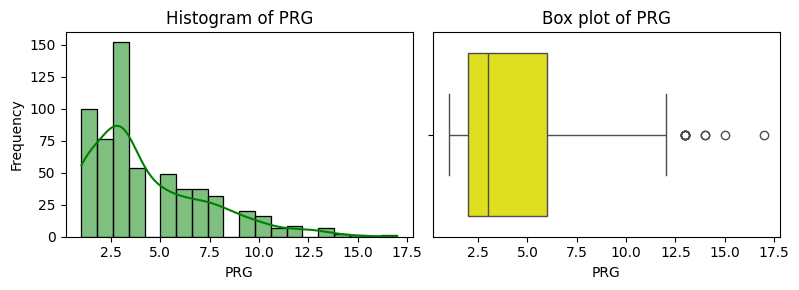

Skewness of PL: 0.5441128827744515


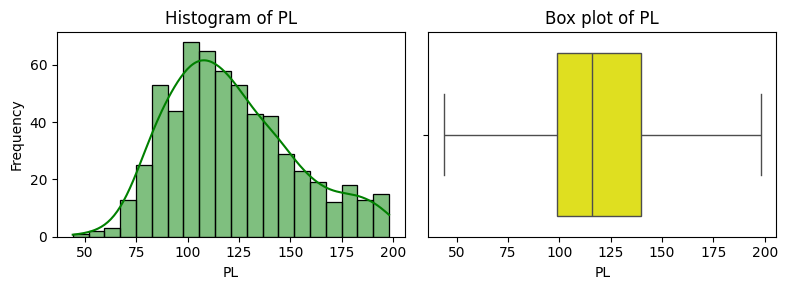

Skewness of PR: 0.1588635803147607


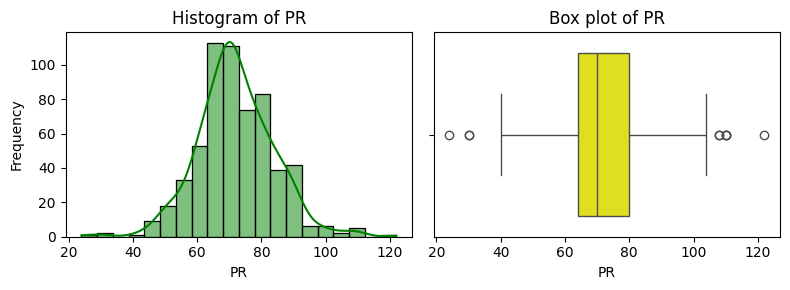

Skewness of SK: 1.3255992816349151


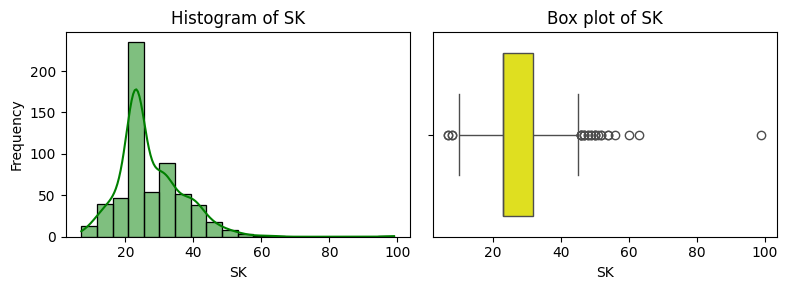

Skewness of TS: 2.905144914274072


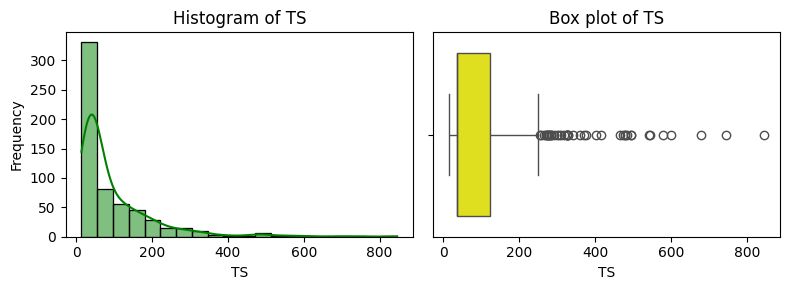

Skewness of M11: 0.6281158998858158


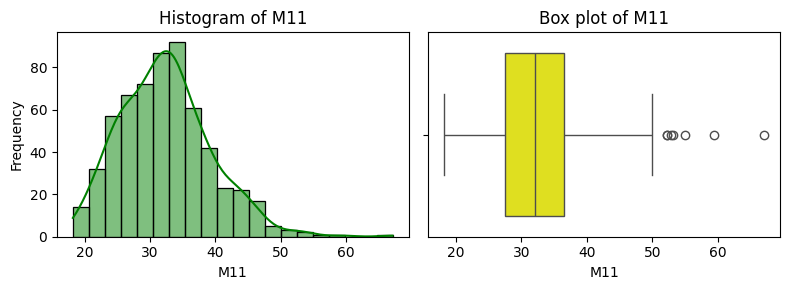

Skewness of BD2: 1.989472326608606


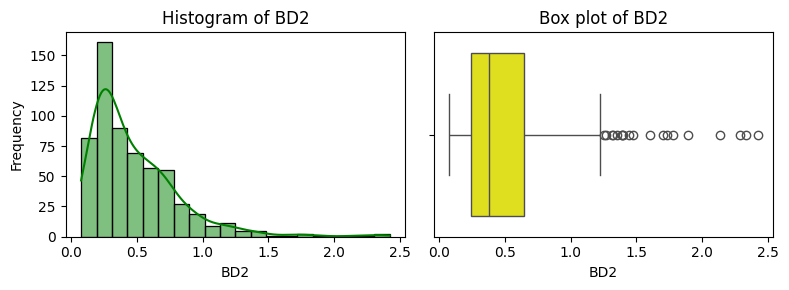

Skewness of Age: 1.1523528641533494


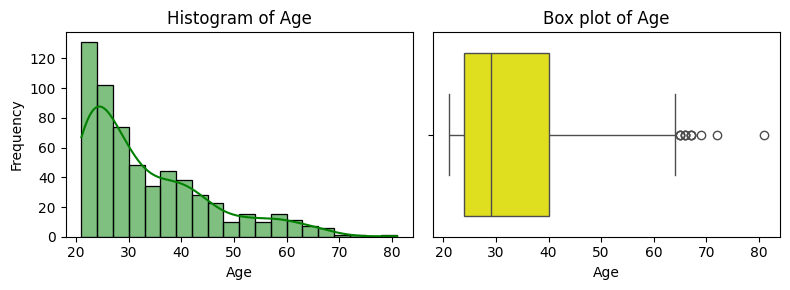

Skewness of Insurance: -0.8042567221912439


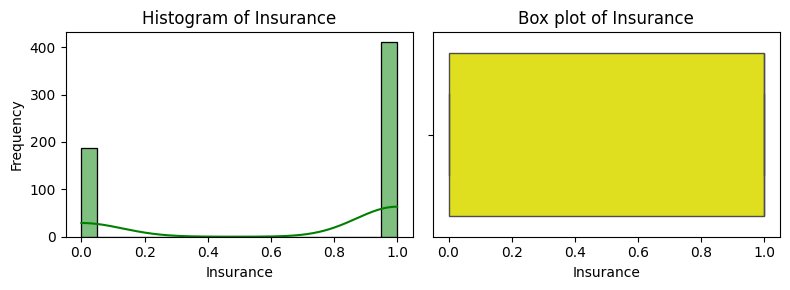

Skewness of Sepssis_numeric: 0.6433106120953698


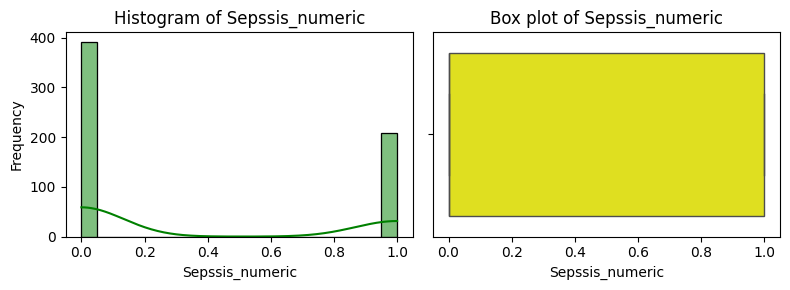

In [185]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for column in numerical_columns:
    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, color='green', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(False)

    # Box plot
    sns.boxplot(x=df[column], color='yellow', ax=axes[1])
    axes[1].set_title(f'Box plot of {column}')
    axes[1].set_xlabel(column)
    axes[1].grid(False)

    # Adjust layout
    plt.tight_layout()

    # Skewness
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")

    plt.show()

**Insights:** 
1. **PRG (Plasma Glucose Level):** The skewness value of 0.91 indicates a moderately skewed distribution, slightly favoring higher values.
2. **PL (Blood Work Result 1):** With a skewness value close to zero (0.12), the distribution appears to be approximately symmetric.
3. **PR (Blood Pressure):** A skewness value of -1.87 suggests a significantly left-skewed distribution, indicating a concentration of lower values.
4. **SK (Blood Work Result 2):** The skewness value of 0.16 indicates a nearly symmetric distribution.
5. **TS (Blood Work Result 3):** A skewness value of 2.40 indicates a highly right-skewed distribution, with a concentration of lower values and a long tail towards higher values.
6. **M11 (Body Mass Index):** The skewness value of -0.41 suggests a slightly left-skewed distribution, with a concentration towards higher values.
7. **BD2 (Blood Work Result 4):** With a skewness value of 1.99, the distribution appears to be significantly right-skewed, with a concentration of lower values and a long tail towards higher values.
8. **Age:** The skewness value of 1.15 indicates a moderately right-skewed distribution, suggesting a concentration of younger ages.

*NB: Considering the distribution characteristics observed and the presence of outliers, utilizing median imputation would be the most suitable approach for addressing potential missing values and/or zero (0) enteries as observed.*

### Bivariate Analysis

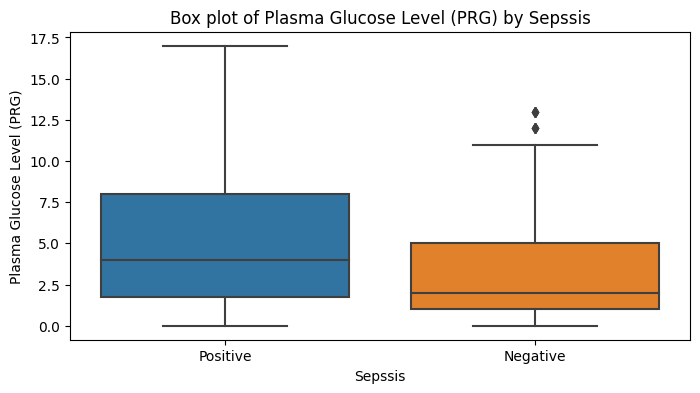

In [18]:
# Box plot for PRG by Sepssis
plt.figure(figsize=(8, 4))
sns.boxplot(x='Sepssis', y='PRG', data=df)
plt.title('Box plot of Plasma Glucose Level (PRG) by Sepssis')
plt.xlabel('Sepssis')
plt.ylabel('Plasma Glucose Level (PRG)')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


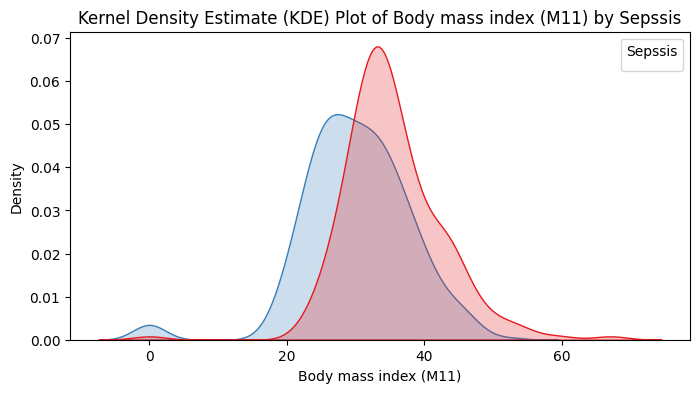

In [19]:
# KDE plot for M11 (Body mass index) by Sepssis
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='M11', hue='Sepssis', fill=True, palette='Set1', common_norm=False)
plt.title('Kernel Density Estimate (KDE) Plot of Body mass index (M11) by Sepssis')
plt.xlabel('Body mass index (M11)')
plt.ylabel('Density')
plt.legend(title='Sepssis')
plt.show()


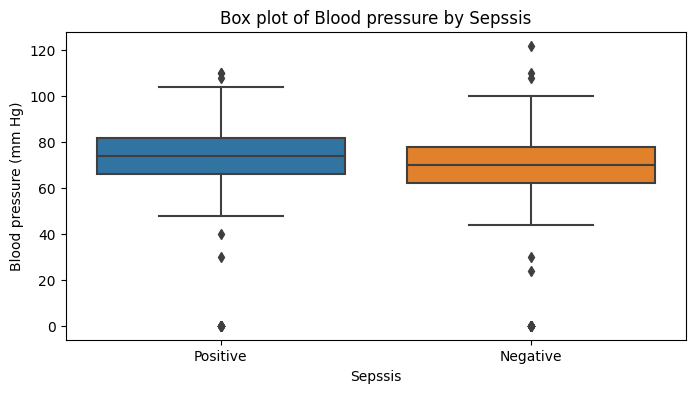

In [20]:
# Box plot for Blood pressure (PR) by Sepssis
plt.figure(figsize=(8, 4))
sns.boxplot(x='Sepssis', y='PR', data=df)
plt.title('Box plot of Blood pressure by Sepssis')
plt.xlabel('Sepssis')
plt.ylabel('Blood pressure (mm Hg)')
plt.show()

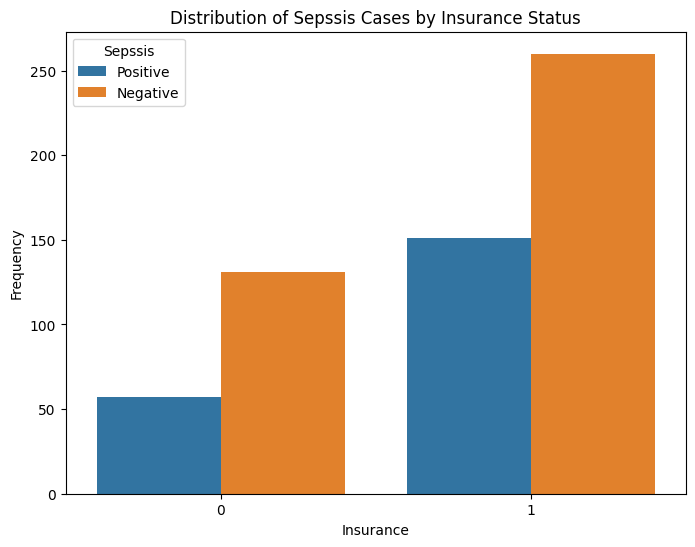

In [21]:
# Bivariate analysis: Insurance vs. Sepssis
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance', hue='Sepssis', data=df)
plt.title('Distribution of Sepssis Cases by Insurance Status')
plt.xlabel('Insurance')
plt.ylabel('Frequency')
plt.legend(title='Sepssis', loc='upper left')
plt.show()

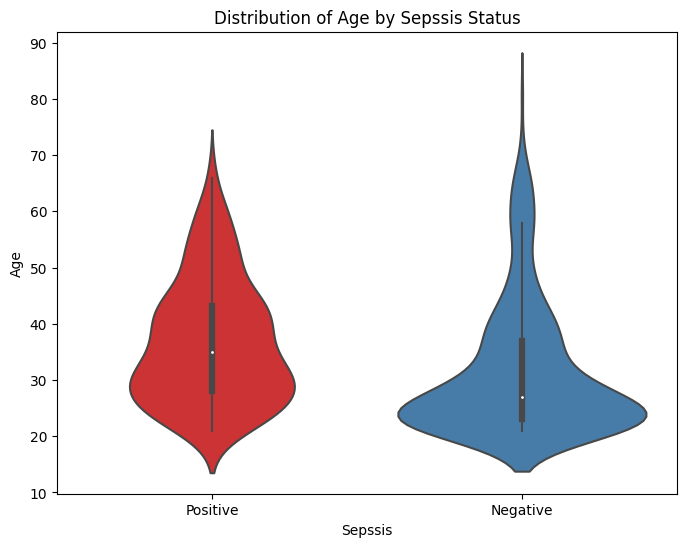

In [22]:
# Bivariate analysis: Age vs. Sepssis
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sepssis', y='Age', data=df, palette='Set1')
plt.title('Distribution of Age by Sepssis Status')
plt.xlabel('Sepssis')
plt.ylabel('Age')
plt.show()

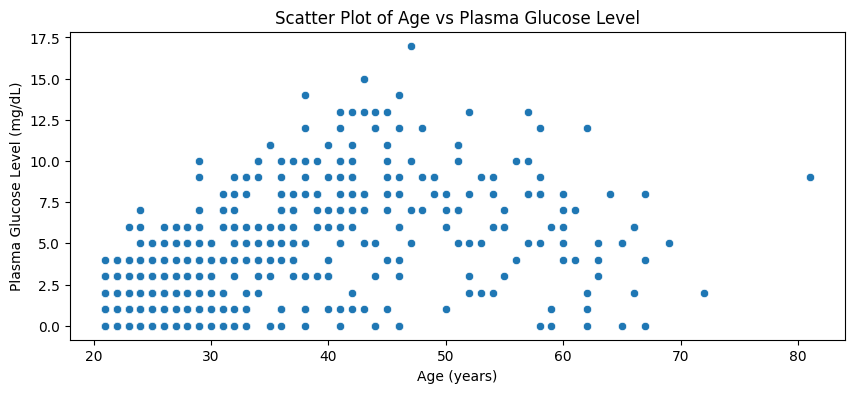

In [23]:
# Scatter plot for Age vs Plasma Glucose Level (PRG)
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Age', y='PRG', data=df)
plt.title('Scatter Plot of Age vs Plasma Glucose Level')
plt.xlabel('Age (years)')
plt.ylabel('Plasma Glucose Level (mg/dL)')
plt.show()


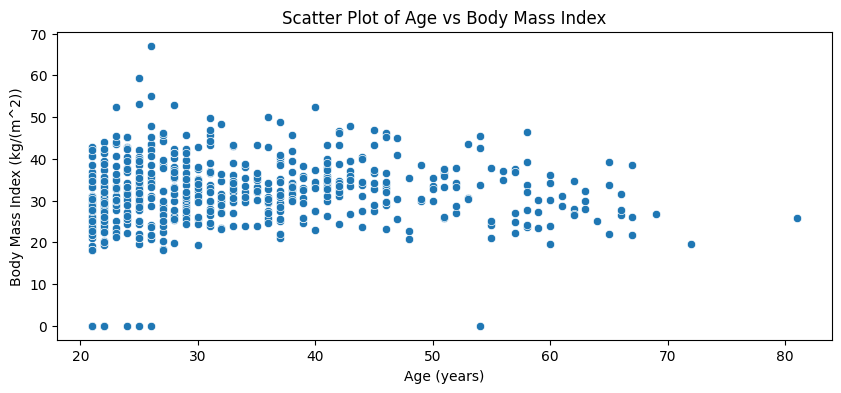

In [24]:
# Scatter plot for Age vs Body Mass Index (BMI)
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Age', y='M11', data=df)
plt.title('Scatter Plot of Age vs Body Mass Index')
plt.xlabel('Age (years)')
plt.ylabel('Body Mass Index (kg/(m^2))')
plt.show()

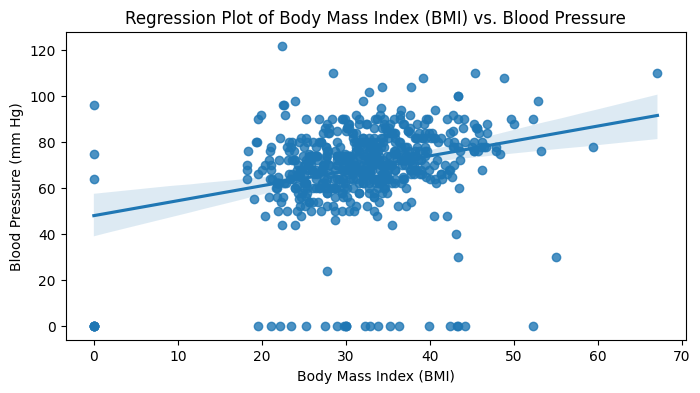

In [25]:
# Regression plot between BMI and Blood Pressure
plt.figure(figsize=(8, 4))
sns.regplot(x='M11', y='PR', data=df)
plt.title('Regression Plot of Body Mass Index (BMI) vs. Blood Pressure')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid(False)
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


## Multivariate Analysis

In [27]:
# relationship among features
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


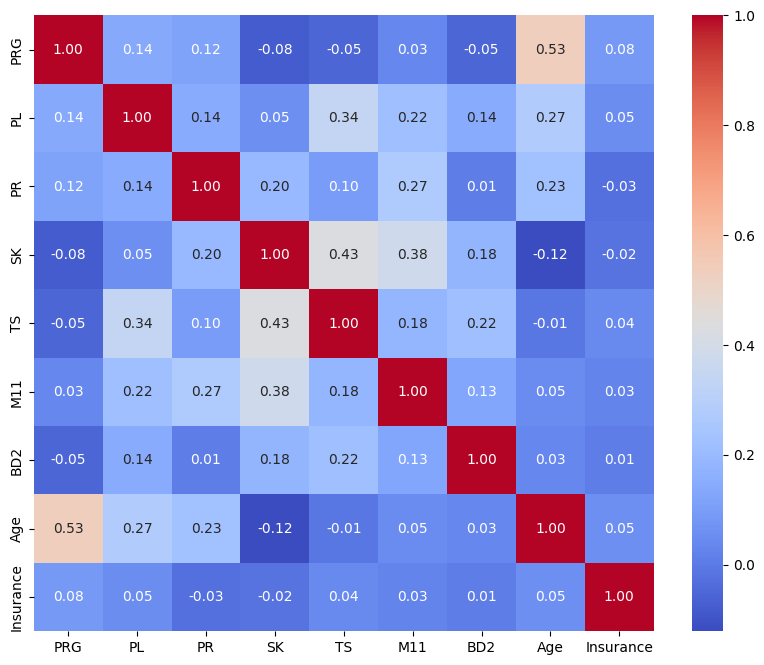

In [28]:
# Plot heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Insight:**
1. Strong Correlations:
 - There is a moderately positive correlation (0.53) between Age and Plasma Glucose Level (PRG), indicating that older patients tend to have higher plasma glucose levels.
 - There is also a positive correlation between PL (Blood Work Result 1) and TS (Blood Work Result 3) with a coefficient of 0.34, suggesting some level of association between these variables.

2. Weak Correlations:
 - Most of the other correlations are relatively weak, with coefficients close to zero. For instance, there's a weak positive correlation between Age and PR (Blood Pressure), and a weak negative correlation between SK (Blood Work Result 2) and Age.

3. No Correlation:
 - Some pairs of variables have correlation coefficients close to zero, indicating no linear relationship between them. For example, there's no significant correlation between Insurance and any other variable in the dataset.

Overall, the correlations observed are generally weak, indicating that the variables are not strongly linearly related to each other.

<Figure size 1000x800 with 0 Axes>

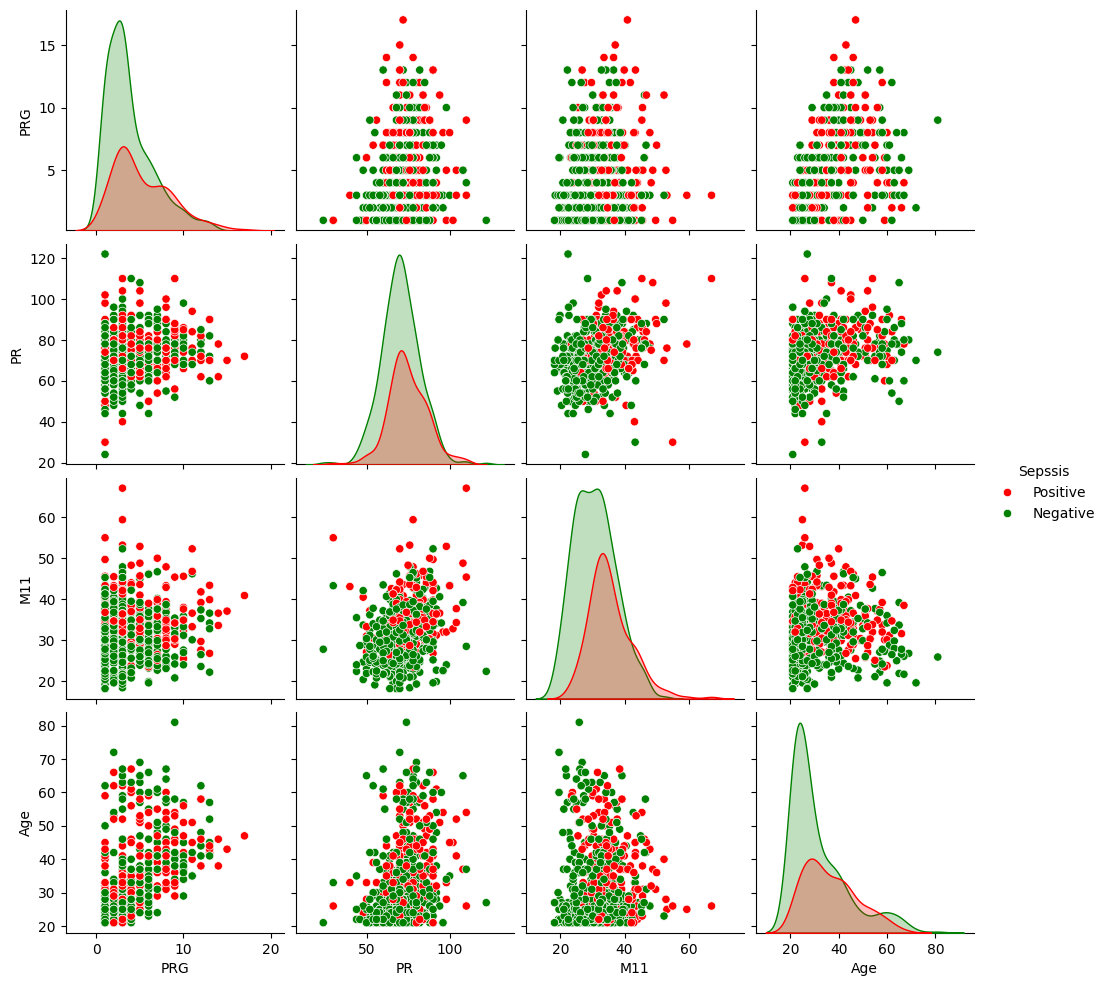

In [184]:
data = df[["PRG","PR",'M11','Age', "Sepssis"]]
plt.figure(figsize=(10, 8))
sns.pairplot(data, palette={'Positive':'red', 'Negative':'green'}, hue = 'Sepssis')
plt.show()

## Answering Analytical Questions

In [30]:
# List of columns with zero values to be replaced
columns_to_replace = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11']

# Replace zero values with median
for column in columns_to_replace:
    median_value = df[column].median()
    df[column] = df[column].replace(0, median_value)

# Verify
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,4.290484,2.987000,1.000,2.000,3.000,6.000,17.00
PL,599.0,121.121870,30.767390,44.000,99.000,116.000,140.000,198.00
PR,599.0,72.005008,11.917146,24.000,64.000,70.000,80.000,122.00
SK,599.0,27.282137,9.451984,7.000,23.000,23.000,32.000,99.00
TS,599.0,96.829716,105.589923,14.000,36.000,36.000,123.500,846.00
M11,599.0,32.400835,6.968917,18.200,27.400,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


1) What is the average body mass index (BMI) of patients diagnosed with sepsis compared to those without sepsis?

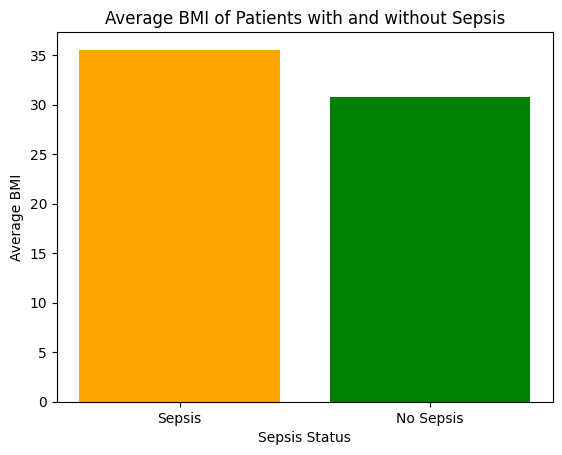

In [183]:
import matplotlib.pyplot as plt

# Calculate average BMI for patients with and without sepsis
avg_bmi_sepsis = df[df['Sepssis'] == 'Positive']['M11'].mean()
avg_bmi_no_sepsis = df[df['Sepssis'] == 'Negative']['M11'].mean()

# Create a bar plot
plt.bar(['Sepsis', 'No Sepsis'], [avg_bmi_sepsis, avg_bmi_no_sepsis], color=['orange', 'green'])
plt.title('Average BMI of Patients with and without Sepsis')
plt.xlabel('Sepsis Status')
plt.ylabel('Average BMI')
plt.show()


2. What is the distribution of BMI categories among patients diagnosed with sepsis compared to those without sepsis?

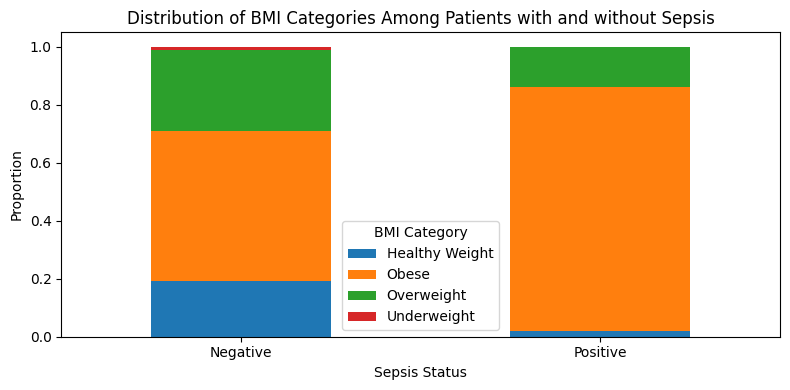

In [32]:
# According to CDC (Centre for Disease Control and Prevention):
# If your BMI is less than 18.5, it falls within the underweight range.
# If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
# If your BMI is 25.0 to 29.9, it falls within the overweight range.
# If your BMI is 30.0 or higher, it falls within the obese range.

# Function to categorize BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25.0:
        return 'Healthy Weight'
    elif 25.0 <= bmi < 30.0:
        return 'Overweight'
    else:
        return 'Obese'

# Apply categorize_bmi function to the 'M11' column to categorize BMI values
df['BMI Category'] = df['M11'].apply(categorize_bmi)

# Group by 'Sepssis' and 'BMI Category' and calculate proportions
grouped = df.groupby(['Sepssis', 'BMI Category']).size().unstack(fill_value=0)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.xlabel('Sepsis Status')
plt.ylabel('Proportion')
plt.title('Distribution of BMI Categories Among Patients with and without Sepsis')
plt.xticks(rotation=0)
plt.legend(title='BMI Category')
plt.tight_layout()
plt.show()

Based on the data, it's notable that the majority of patients diagnosed with sepsis fall into the categories of obese and overweight based on their BMI. This suggests a potential correlation between higher BMI values and the likelihood of developing sepsis.

3) Does Age Correlate with Sepsis Occurrence?

In [33]:
# Calculate the correlation coefficient between Age and Sepsis occurrence
correlation = df['Age'].corr(df['Sepssis'].map({'Positive': 1, 'Negative': 0}))

# Print the correlation coefficient
print("Correlation between Age and Sepsis occurrence:", correlation)


Correlation between Age and Sepsis occurrence: 0.21023428582351372


The correlation coefficient between age and sepsis occurrence is approximately 0.21. This positive correlation suggests that there is a weak positive relationship between age and the likelihood of sepsis occurrence.

4) What is the average age of patients diagnosed with sepsis?

In [34]:
# Filter the dataset for patients diagnosed with sepsis
sepsis_patients = df[df['Sepssis'] == 'Positive']

# Calculate the average age of patients diagnosed with sepsis
average_age_sepsis = sepsis_patients['Age'].mean()

print("Average age of patients diagnosed with sepsis:", f'{average_age_sepsis:.2f} years')

Average age of patients diagnosed with sepsis: 36.70 years


5) Is there a correlation between blood pressure levels and the likelihood of developing sepsis?

In [35]:
# Convert 'Sepssis' column to numerical values
df['Sepssis_numeric'] = df['Sepssis'].map({'Positive': 1, 'Negative': 0})

# Calculate the correlation between blood pressure (PR) and the occurrence of sepsis (Sepssis)
correlation_blood_pressure_sepsis = df['PR'].corr(df['Sepssis_numeric'])

print("Correlation between blood pressure and sepsis occurrence:", correlation_blood_pressure_sepsis)

Correlation between blood pressure and sepsis occurrence: 0.1666690336829569


The correlation coefficient between blood pressure and sepsis occurrence is approximately 0.167. This indicates a weak positive correlation between blood pressure levels and the likelihood of developing sepsis. However, the correlation is not strong, suggesting that blood pressure alone may not be a reliable predictor of sepsis occurrence.

6) What is the Average plasma glucose level of patients with and without Sepsis?

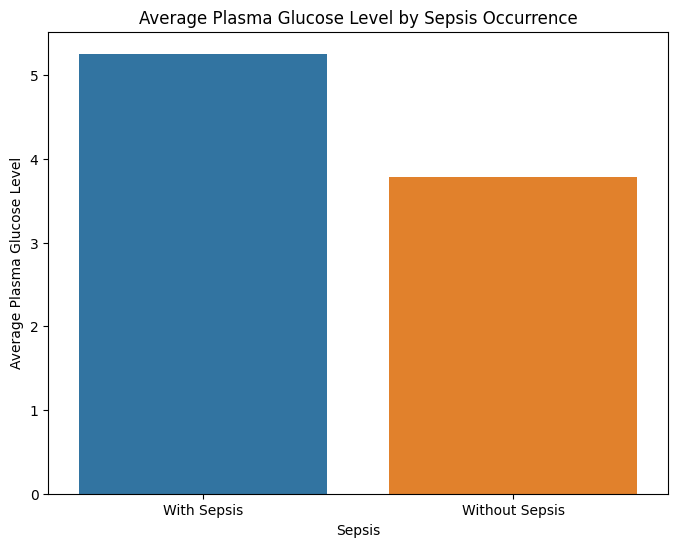

In [36]:
# Calculate the average plasma glucose level for patients with and without sepsis
avg_prg_sepsis = df[df['Sepssis'] == 'Positive']['PRG'].mean()
avg_prg_no_sepsis = df[df['Sepssis'] == 'Negative']['PRG'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Sepsis', 'Without Sepsis'], y=[avg_prg_sepsis, avg_prg_no_sepsis])
plt.title('Average Plasma Glucose Level by Sepsis Occurrence')
plt.xlabel('Sepsis')
plt.ylabel('Average Plasma Glucose Level')
plt.show()

The average plasma glucose level of patients with sepsis is approximately 5.2, while the average plasma glucose level of patients without sepsis is approximately 3.7.  This indicates that, on average, patients diagnosed with sepsis tend to have higher plasma glucose levels compared to those without sepsis.

7) How does the distribution of insurance status differ between septic and non-septic patients?

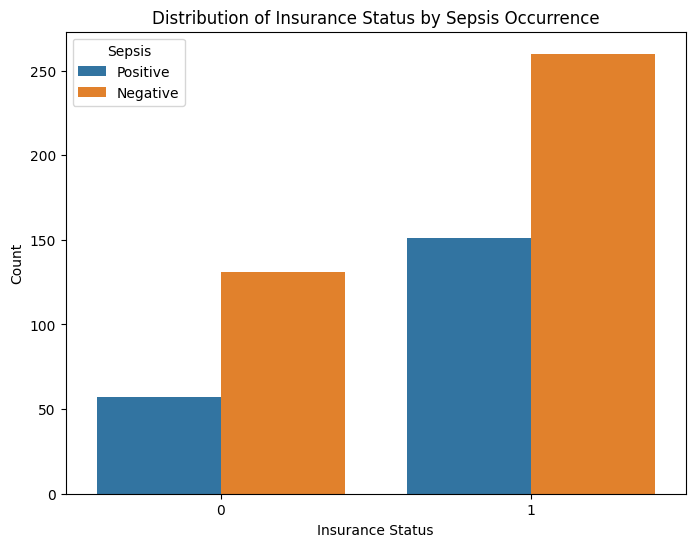

In [37]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Insurance', hue='Sepssis')
plt.title('Distribution of Insurance Status by Sepsis Occurrence')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.legend(title='Sepsis')
plt.show()

## Hypothesis Testing

In [38]:
# Create age groups
age_bins = [20, 40, 60, 80, float('inf')]
age_labels = ['20-39', '40-59', '60-79', '80+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create the contingency table
contingency_table = pd.crosstab(df['Age Group'], df['Sepssis'])

print(contingency_table)

Sepssis    Negative  Positive
Age Group                    
20-39           319       132
40-59            55        71
60-79            16         5
80+               1         0


In [39]:
# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Check the p-value
alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between age and sepsis.")
    print("Specifically, older patients may be more likely to develop sepsis compared to younger patients.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between age and sepsis.")


Chi-square statistic: 33.55383159633323
P-value: 2.460922116459635e-07
Reject the null hypothesis. There is a significant relationship between age and sepsis.
Specifically, older patients may be more likely to develop sepsis compared to younger patients.


Given the p-value of approximately 2.46e-07 (2.46 * 10^-7) and an alpha level of 0.01, we can confidently reject the null hypothesis. This indicates compelling evidence supporting a significant relationship between age and sepsis occurrence. In essence, age appears to play a substantial role in predicting the likelihood of sepsis occurrence.

## Data Preparation

##### Verify if dataset is balanced

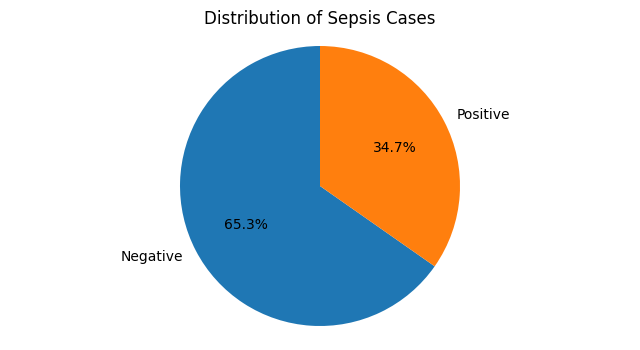

In [40]:
# calculate the count of unique values in the "Sepssis" column
Sepsis_count = df["Sepssis"].value_counts().reset_index()

# Extracting count values
counts = Sepsis_count['count']

# Creating a pie chart to visualize Sepsis occurrence
plt.figure(figsize=(8, 4))
plt.pie(counts, labels=Sepsis_count['Sepssis'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sepsis Cases')
plt.axis('equal')
plt.show()

* The negative status represents 65.3% of the data, while the positive status represents 34.7%. This imbalance could potentially affect the performance of machine learning models trained on this data, particularly those sensitive to class distribution.

In [41]:
# Check summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               599 non-null    object  
 1   PRG              599 non-null    int64   
 2   PL               599 non-null    int64   
 3   PR               599 non-null    int64   
 4   SK               599 non-null    int64   
 5   TS               599 non-null    int64   
 6   M11              599 non-null    float64 
 7   BD2              599 non-null    float64 
 8   Age              599 non-null    int64   
 9   Insurance        599 non-null    int64   
 10  Sepssis          599 non-null    object  
 11  BMI Category     599 non-null    object  
 12  Sepssis_numeric  599 non-null    int64   
 13  Age Group        599 non-null    category
dtypes: category(1), float64(2), int64(8), object(3)
memory usage: 61.7+ KB


In [42]:
# drop unneeded column
columns_drop = ['ID', 'BMI Category', 'Sepssis_numeric', 'Age Group']
df = df.drop(columns=columns_drop)

#### Split data into input (x) and target (y) features

In [43]:
X = df.drop(['Sepssis'], axis=1)  # Features
y = df['Sepssis']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42,)

In [44]:
# Print the shapes of the train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (449, 9)
y_train shape: (449,)
X_test shape: (150, 9)
y_test shape: (150,)


### Label Encoder

In [45]:
# Fit and transform the label encoder on y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Feature Engineering

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.2 KB


In [47]:
input_features = X.columns
input_features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

#### Create a preprocessor

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'),  input_features), # Impute missing values with median
        ('scaler', RobustScaler(), input_features), # Scale the features using RobustScaler
        ('log_transformations', FunctionTransformer(np.log1p), input_features) # Apply log transformation
    ])

## Modelling and Evaluation

In [49]:
# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
    ('gradient_classifier', GradientBoostingRegressor(random_state=42))
]

#### Train and Compare Models - Unbalanced

In [50]:
results_table = pd.DataFrame(columns=["Model Name", "Precision", "Recall", "Accuracy", "F1_Score"])

all_pipelines = {}

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature Importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)                
    ])

    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Convert y_pred to integers
    y_pred = y_pred.astype(int)

    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    all_pipelines[model_name] = pipeline

    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    results_table.loc[len(results_table)] = [model_name, precision, recall, accuracy, f1_score]

results_table.sort_values('F1_Score', ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
5,rf_classifier,0.756340,0.760000,0.760000,0.757600
1,logistic_classifier,0.750355,0.753333,0.753333,0.751529
2,K-nearest_classifier,0.706667,0.706667,0.706667,0.706667
0,tree_classifier,0.682978,0.680000,0.680000,0.681369
3,svm_classifier,0.673982,0.686667,0.686667,0.676461
4,sgd_classifier,0.624832,0.640000,0.640000,0.629589
6,gradient_classifier,0.788230,0.686667,0.686667,0.587787


**Insights🧮 :**

Though, the dataset is unbalanced, the Random Forest Classifier and Logistic Regression Classifier appears to be the top-performing models for predicting sepsis occurrence based on the results of the classification metrics. They achieve high F1 scores and accuracies, indicating a good balance between precision and recall. These models outperform other classifiers such as K-Nearest Neighbors, Decision Tree, Support Vector Machine, Stochastic Gradient Descent, and Gradient Boosting classifiers.

#### Train and Compare Models - Balanced

In [51]:
balanced_data_results_table = pd.DataFrame(columns=["Model Name", "Precision", "Recall", "Accuracy", "F1_Score"])

balanced_pipelines = {}

for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy="auto")),
        ('feature Importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)                
    ])

    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Convert y_pred to integers
    y_pred = y_pred.astype(int)

    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    balanced_pipelines[model_name] = pipeline

    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

    balanced_data_results_table.loc[len(balanced_data_results_table)] = [model_name, precision, recall, accuracy, f1_score]

balanced_data_results_table.sort_values(by='F1_Score', ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
5,rf_classifier,0.771467,0.773333,0.773333,0.772256
1,logistic_classifier,0.765841,0.740000,0.740000,0.745613
3,svm_classifier,0.704949,0.680000,0.680000,0.686675
4,sgd_classifier,0.697778,0.706667,0.706667,0.670965
2,K-nearest_classifier,0.692059,0.660000,0.660000,0.667739
0,tree_classifier,0.666963,0.653333,0.653333,0.658338
6,gradient_classifier,0.740313,0.686667,0.686667,0.596428


**Insights🧮 :**

- Random Forest (rf_classifier) and Logistic Regression (logistic_classifier) emerge as the top performers, maintaining high precision, recall, accuracy, and F1-score. This reaffirms their effectiveness in predicting sepsis occurrence, even with a balanced dataset.

- With Balancing with Smote, several classifiers, particularly SVM (svm_classifier) and Stochastic Gradient Descent (sgd_classifier) demonstrate improved metrics in precision, recall, accuracy, and F1-score compared to the unbalanced dataset. This suggests that addressing class imbalance enhances model performance across various algorithms.

- K-Nearest Neighbors (K-nearest_classifier) and Decision Tree Classifier (tree_classifier) experiences a decline in performance, particularly in precision. This unexpected outcome indicates that oversampling might not always improve the performance of every model.

- In conclusion, while Random Forest and Logistic Regression maintain their dominance, the balanced dataset results showcase overall improvements across multiple classifiers, validating the efficacy of SMOTE oversampling in enhancing predictive performance in sepsis prediction.

### Hyperparameter Tuning

In [54]:
tuned_models_df = pd.DataFrame(columns=["Model Name", "Precision", "Recall", "Accuracy", "F1_Score"])

param_grids = {
    'tree_classifier':{
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10, 15],
        'classifier__min_samples_leaf': [1, 2, 4, 8] 
    },

    'logistic_classifier': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },

    'K-nearest_classifier': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },

    'svm_classifier': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },

    'sgd_classifier': {
        'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'classifier__max_iter': [100, 200, 300],
    },

    'rf_classifier': {
        'classifier__n_estimators': [150, 250, 350, 450],
        'classifier__max_depth': [None, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10, 15],
        'classifier__min_samples_leaf': [1, 2, 4, 8] 
    },

    'gradient_classifier': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 1],
        'classifier__max_depth': [3, 5, 7]
    }
}

for model_name, pipeline in all_pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train_encoded)

    best_pipeline = grid_search.best_estimator_
    all_pipelines[model_name] = best_pipeline

    y_pred = best_pipeline.predict(X_test)
    
    # Convert y_pred to integers
    y_pred = y_pred.astype(int)

    tuned_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    accuracy = tuned_metrics['accuracy']
    precision = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics['weighted avg']['recall']
    f1_score = tuned_metrics['weighted avg']['f1-score']

    tuned_models_df.loc[len(tuned_models_df)] = [model_name, precision, recall, accuracy, f1_score]

tuned_models_df.sort_values(by='F1_Score', ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
5,rf_classifier,0.755033,0.760000,0.760000,0.756217
0,tree_classifier,0.752260,0.753333,0.753333,0.752762
1,logistic_classifier,0.750355,0.753333,0.753333,0.751529
4,sgd_classifier,0.739259,0.746667,0.746667,0.739340
3,svm_classifier,0.733630,0.740000,0.740000,0.735101
2,K-nearest_classifier,0.683888,0.693333,0.693333,0.686569
6,gradient_classifier,0.426844,0.653333,0.653333,0.516344


### Model Persistence

In [56]:
for model_name, pipeline in all_pipelines.items():
    joblib.dump(pipeline, f'./models/{model_name}_pipeline.pkl')

joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

## LOAD TEST DATASET

In [ ]:
# Read the CSV file into a DataFrame
test_df = pd.read_csv('./Dataset/Paitients_Files_Test.csv')
test_df